# Réalisé par :

#   **Boussaid Ahmed Aziz**
#   **Ellouze Karim**
#   **Guedidi Selma**

## Intelligence artificielle et raisonnement TP1

Considérons le jeu du taquin suivant où il s’agit  de passer de l’état initial (à gauche) à l’état final (à droite)

In [ ]:
from IPython import display
display.Image("jeu_taquin.png")

En utilisant le langage Python, on vous demande de :

    1. Coder de manière générique les états, les actions, la fonction de transition d’états, l’état initial et les états finaux d’un problème de recherche dans un graphe d’états.

In [ ]:
class Taquin:
    def __init__(self, initial_state):
        self.state = initial_state

    def __str__(self):
        return "\n".join([" ".join(map(str, row)) for row in self.state])

    def find_empty_tile(self):
        for i in range(3):
            for j in range(3):
                if self.state[i][j] == 0:
                    return i, j

    def move(self, direction):
        empty_tile_row, empty_tile_col = self.find_empty_tile()

        if direction == 'up':
            new_row = empty_tile_row - 1
            new_col = empty_tile_col
        elif direction == 'down':
            new_row = empty_tile_row + 1
            new_col = empty_tile_col
        elif direction == 'left':
            new_row = empty_tile_row
            new_col = empty_tile_col - 1
        elif direction == 'right':
            new_row = empty_tile_row
            new_col = empty_tile_col + 1
        else:
            return False  # Invalid movement

        # Vérification des limites pour s'assurer que le mouvement est valide
        if 0 <= new_row < 3 and 0 <= new_col < 3:
            # Échange des positions de la tuile vide et de la tuile adjacente
            self.state[empty_tile_row][empty_tile_col], self.state[new_row][new_col] = \
                self.state[new_row][new_col], self.state[empty_tile_row][empty_tile_col]
            return True
        else:
            return False
    def is_goal(self):
        # Vérifie si la configuration actuelle est le but (puzzle résolu)
        return self.state == [[0,1, 2], [3, 4, 5], [6, 7,8]]


In [ ]:
# Define the initial state
initial_state = [[1, 4, 2], [3, 7, 5], [6, 8,0]]

# Initialize taquin
taquin = Taquin(initial_state)


In [ ]:
# Print the initial state
print("Initial State:")
print(taquin)

# Move the tile in different directions
taquin.move('up')  # Move the empty tile up
print("\nAfter moving up:")
print(taquin)

taquin.move('left')  # Move the empty tile left
print("\nAfter moving left:")
print(taquin)

taquin.move('down')  # Move the empty tile down
print("\nAfter moving down:")
print(taquin)

taquin.move('right')  # Move the empty tile right
print("\nAfter moving right:")
print(taquin)


Initial State:
1 4 2
3 7 5
6 8 0

After moving up:
1 4 2
3 7 0
6 8 5

After moving left:
1 4 2
3 0 7
6 8 5

After moving down:
1 4 2
3 8 7
6 0 5

After moving right:
1 4 2
3 8 7
6 5 0


    2. Coder de manière générique les algorithmes :
        a. Recherche en profondeur limitée
        b. Recherche par profondeur itérative
        c. Recherche A*

#### Recherche par profondeur limitée

In [ ]:
movement_count = 0

def limited_depth_search(node, depth_limit, visited=None, open_set=None):
    if visited is None:
        visited = set()

    if open_set is None:
        open_set = set()

    if node.is_goal():
        visited.add(tuple(map(tuple, node.state)))
        print("Solution found:")
        print(node)
        print("Number of visited nodes is:", len(visited))
        return True, len(visited), open_set

    if depth_limit == 0 or tuple(map(tuple, node.state)) in visited:
        visited.add(tuple(map(tuple, node.state)))
        return False, len(visited), open_set

    visited.add(tuple(map(tuple, node.state)))
    open_set.add(tuple(map(tuple, node.state)))

    for direction in ['up', 'left', 'down', 'right']:
        new_node = Taquin([row[:] for row in node.state])
        if new_node.move(direction):
            print(f"Moving {direction}:")
            print(new_node)

            global movement_count
            movement_count += 1
            print(f"Movement count: {movement_count}")
            result, visited_count, open_set = limited_depth_search(new_node, depth_limit - 1, visited, open_set)
            if result:
                return True, visited_count, open_set

    return False, len(visited), open_set

*Exécution*



In [ ]:
depth_limit = 5  #  the desired depth limit
result, visited_count, open_set = limited_depth_search(taquin, depth_limit)
print("Total number of visited nodes:", visited_count)
print("Open set:",  len(open_set),open_set)

Moving up:
1 4 0
3 7 2
6 8 5
Movement count: 1
Moving left:
1 0 4
3 7 2
6 8 5
Movement count: 2
Moving left:
0 1 4
3 7 2
6 8 5
Movement count: 3
Moving down:
3 1 4
0 7 2
6 8 5
Movement count: 4
Moving up:
0 1 4
3 7 2
6 8 5
Movement count: 5
Moving down:
3 1 4
6 7 2
0 8 5
Movement count: 6
Moving right:
3 1 4
7 0 2
6 8 5
Movement count: 7
Moving right:
1 0 4
3 7 2
6 8 5
Movement count: 8
Moving down:
1 7 4
3 0 2
6 8 5
Movement count: 9
Moving up:
1 0 4
3 7 2
6 8 5
Movement count: 10
Moving left:
1 7 4
0 3 2
6 8 5
Movement count: 11
Moving up:
0 7 4
1 3 2
6 8 5
Movement count: 12
Moving down:
1 7 4
6 3 2
0 8 5
Movement count: 13
Moving right:
1 7 4
3 0 2
6 8 5
Movement count: 14
Moving down:
1 7 4
3 8 2
6 0 5
Movement count: 15
Moving up:
1 7 4
3 0 2
6 8 5
Movement count: 16
Moving left:
1 7 4
3 8 2
0 6 5
Movement count: 17
Moving right:
1 7 4
3 8 2
6 5 0
Movement count: 18
Moving right:
1 7 4
3 2 0
6 8 5
Movement count: 19
Moving up:
1 7 0
3 2 4
6 8 5
Movement count: 20
Moving left:
1 7

#### Recherche par profondeur itérative

In [ ]:

def iterative_depth_search(taquin):
    nb_total_visited_states = 0
    max_depth = 1
    total_open_set = set()

    while True:
        result, visited_count, open_set = limited_depth_search(taquin, max_depth)
        nb_total_visited_states += visited_count
        total_open_set.update(open_set)

        if result:
            print("Total number of visited nodes:", nb_total_visited_states)
            print("Total open set:",total_open_set)
            return nb_total_visited_states, total_open_set

        max_depth += 1


*Exécution*



In [ ]:
print(iterative_depth_search(taquin))

Moving up:
1 4 2
3 7 0
6 8 5
Movement count: 317
Moving left:
1 4 2
3 7 5
6 0 8
Movement count: 318
Moving up:
1 4 2
3 7 0
6 8 5
Movement count: 319
Moving up:
1 4 0
3 7 2
6 8 5
Movement count: 320
Moving left:
1 4 2
3 0 7
6 8 5
Movement count: 321
Moving down:
1 4 2
3 7 5
6 8 0
Movement count: 322
Moving left:
1 4 2
3 7 5
6 0 8
Movement count: 323
Moving up:
1 4 2
3 0 5
6 7 8
Movement count: 324
Moving left:
1 4 2
3 7 5
0 6 8
Movement count: 325
Moving right:
1 4 2
3 7 5
6 8 0
Movement count: 326
Moving up:
1 4 2
3 7 0
6 8 5
Movement count: 327
Moving up:
1 4 0
3 7 2
6 8 5
Movement count: 328
Moving left:
1 0 4
3 7 2
6 8 5
Movement count: 329
Moving down:
1 4 2
3 7 0
6 8 5
Movement count: 330
Moving left:
1 4 2
3 0 7
6 8 5
Movement count: 331
Moving up:
1 0 2
3 4 7
6 8 5
Movement count: 332
Moving left:
1 4 2
0 3 7
6 8 5
Movement count: 333
Moving down:
1 4 2
3 8 7
6 0 5
Movement count: 334
Moving right:
1 4 2
3 7 0
6 8 5
Movement count: 335
Moving down:
1 4 2
3 7 5
6 8 0
Movement cou

#### Recherche A*

    3. Instancier avec le problème du Taquin en utilisant 2 heuristiques admissibles vues en cours

In [ ]:
from copy import deepcopy

def heuristic_h1(state):
    # Misplaced tiles heuristic
    goal_state = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
    misplaced = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != goal_state[i][j]:
                misplaced += 1
    return misplaced

def heuristic_h2(state):
    goal_state = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
    h2 = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] != 0:
                row, col = divmod(state[i][j] - 1, 3)
                h2 += abs(row - i) + abs(col - j)
    return h2

def a_star_search(taquin, heuristic):
    start_node = taquin
    closed_set = set()
    open_set = [(0, start_node, [])]
    number_movement = 0
    visited_nodes = set()
    max_open_set_size = 0  # Counter for the maximum open set size

    while open_set:
        open_set.sort(key=lambda item: item[0])
        current_priority, node, path = open_set.pop(0)

        # Update the maximum open set size
        max_open_set_size = max(max_open_set_size, len(open_set) + 1)

        if str(node.state) not in visited_nodes:
            visited_nodes.add(str(node.state))

        if node.is_goal():
            result = deepcopy(taquin)
            for direction in path:
                result.move(direction)
                print(result)
                print("\n")
            print("Number of visited nodes (A*):", len(visited_nodes))
            print("Maximum open set size (A*):", max_open_set_size)
            return path, len(visited_nodes), max_open_set_size

        closed_set.add(str(node.state))
        for direction in ["up", "down", "left", "right"]:
            child = deepcopy(node)
            child.move(direction)
            print("After moving", direction, ":")
            number_movement += 1
            print("Movement number:", number_movement)
            print(child, "\n")

            if str(child.state) not in closed_set and str(child.state) not in visited_nodes:
                open_set.append((len(path) + heuristic(child.state), child, path + [direction]))

    return None, None, None


*Exécution*



In [ ]:
a_star_search(taquin, heuristic_h1)
a_star_search(taquin, heuristic_h2)

After moving up :
Movement number: 1
1 4 2
3 7 0
6 8 5 

After moving down :
Movement number: 2
1 4 2
3 7 5
6 8 0 

After moving left :
Movement number: 3
1 4 2
3 7 5
6 0 8 

After moving right :
Movement number: 4
1 4 2
3 7 5
6 8 0 

After moving up :
Movement number: 5
1 4 2
3 0 5
6 7 8 

After moving down :
Movement number: 6
1 4 2
3 7 5
6 0 8 

After moving left :
Movement number: 7
1 4 2
3 7 5
0 6 8 

After moving right :
Movement number: 8
1 4 2
3 7 5
6 8 0 

After moving up :
Movement number: 9
1 0 2
3 4 5
6 7 8 

After moving down :
Movement number: 10
1 4 2
3 7 5
6 0 8 

After moving left :
Movement number: 11
1 4 2
0 3 5
6 7 8 

After moving right :
Movement number: 12
1 4 2
3 5 0
6 7 8 

After moving up :
Movement number: 13
1 0 2
3 4 5
6 7 8 

After moving down :
Movement number: 14
1 4 2
3 0 5
6 7 8 

After moving left :
Movement number: 15
0 1 2
3 4 5
6 7 8 

After moving right :
Movement number: 16
1 2 0
3 4 5
6 7 8 

1 4 2
3 7 5
6 0 8


1 4 2
3 0 5
6 7 8


1 0 2
3 4 5
6

(['left', 'up', 'up', 'left'], 16, 13)

# **Amélioration A***

Dans cette modification, la variable **last_move** est utilisée pour stocker le dernier mouvement. Lors de la génération de nœuds enfants, il vérifie si le mouvement opposé est effectué et **ignore** cette itération si **nécessaire**. De cette façon, vous évitez de faire le mouvement inverse par étapes consécutives. Nous essaierons également d'améliorer l'algorithme de recherche A* en **éliminant les nœuds peu prometteurs**. Dans cette version, le paramètre **cost_threshold** est introduit. Les nœuds dont les coûts estimés dépassent ce seuil ne sont pas ajoutés à l'ensemble ouvert, ce qui réduit le nombre de nœuds explorés.😀

In [ ]:
def a_star_search_improved(taquin, heuristic, cost_threshold=float('inf')):
    start_node = taquin
    open_set = [(0, start_node, [])]
    closed_set = set()
    number_movement = 0
    last_move = None
    opposite_directions = {("up", "down"), ("down", "up"), ("left", "right"), ("right", "left")}

    while open_set:
        open_set.sort(key=lambda item: item[0])
        _, node, path = open_set.pop(0)

        if str(node.state) in closed_set:
            continue

        closed_set.add(str(node.state))

        if node.is_goal():
            result = deepcopy(taquin)
            for direction in path:
                result.move(direction)
                print(result)
                print("\n")
            print("Number of visited nodes is:", len(closed_set))
            return path

        for direction in ["up", "down", "left", "right"]:
            if (last_move, direction) in opposite_directions:
                continue  # Avoid moving in the opposite direction

            child = deepcopy(node)
            if child.move(direction):
                print("After moving", direction, ":")
                number_movement += 1
                print("Movement number:", number_movement)
                print(child, "\n")

                estimated_cost = len(path) + heuristic(child.state)
                if str(child.state) not in closed_set and (str(child.state), estimated_cost) not in open_set and estimated_cost < cost_threshold:
                    open_set.append((estimated_cost, child, path + [direction]))

        # Save the last movement
        if path:
            last_move = path[-1]

    return None


*Exécution*



In [ ]:
a_star_search_improved(taquin, heuristic_h2,cost_threshold=50)

After moving up :
Movement number: 1
1 4 2
3 7 0
6 8 5 

After moving left :
Movement number: 2
1 4 2
3 7 5
6 0 8 

After moving up :
Movement number: 3
1 4 0
3 7 2
6 8 5 

After moving down :
Movement number: 4
1 4 2
3 7 5
6 8 0 

After moving left :
Movement number: 5
1 4 2
3 0 7
6 8 5 

After moving up :
Movement number: 6
1 4 2
3 0 5
6 7 8 

After moving left :
Movement number: 7
1 4 2
3 7 5
0 6 8 

After moving right :
Movement number: 8
1 4 2
3 7 5
6 8 0 

After moving up :
Movement number: 9
1 0 2
3 4 5
6 7 8 

After moving down :
Movement number: 10
1 4 2
3 7 5
6 0 8 

After moving left :
Movement number: 11
1 4 2
0 3 5
6 7 8 

After moving up :
Movement number: 12
1 4 2
0 7 5
3 6 8 

After moving right :
Movement number: 13
1 4 2
3 7 5
6 0 8 

After moving down :
Movement number: 14
1 4 2
3 0 5
6 7 8 

After moving left :
Movement number: 15
0 1 2
3 4 5
6 7 8 

After moving up :
Movement number: 16
0 4 2
1 3 5
6 7 8 

After moving right :
Movement number: 17
1 4 2
3 0 5
6 7 8 

['left', 'up', 'up', 'left']

    4. Comparer les algorithmes à l’aide d’un graphique :  nombre de nœuds traités, taille maximale de la liste des nœuds candidats (ouverts)

**Limited depth search :**

The total number of nodes explored in the worst case is given by the formula:

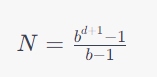

the open set's maximum size would be the number of nodes at the last level of the search tree. This corresponds to:

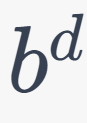


*with d being the depth limit and b being the branchement factor (here b=4)*

**Iterative depth search :**

The total number of nodes explored in the worst case is given by the formula:


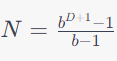

the maximum size of the open set in each iteration is:

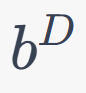

*with D being the depth of the optimal solution and b being the branchement factor (here b=4)*

 **A* search :**


the maximum size of the open set in each iteration is:


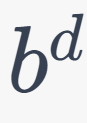

the open set's maximum size would be approximately:


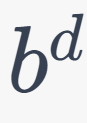

*with d being the depth of the optimal solution and b being the branchement factor (here b=4)*

**Comparaison des algorithmes avec taquin 3*3**

In [ ]:
# Example of taquin 3*3
initial_state = [[1, 4, 2], [3, 7, 5], [6, 8, 0]]
taquin = Taquin(initial_state)

# Run iterative_depth_search to get the data for the plot
visited_iterative, open_set_iterative = iterative_depth_search(taquin)

# Run limited_depth_search separately to get its data
result_limited, visited_limited, open_set_limited = limited_depth_search(taquin, 5)

path_a_star, visited_a_star, max_open_set_a_star = a_star_search(taquin, heuristic_h1)
path_a_star2, visited_a_star2, max_open_set_a_star2 = a_star_search(taquin, heuristic_h1)

Moving up:
1 4 2
3 7 0
6 8 5
Movement count: 673
Moving left:
1 4 2
3 7 5
6 0 8
Movement count: 674
Moving up:
1 4 2
3 7 0
6 8 5
Movement count: 675
Moving up:
1 4 0
3 7 2
6 8 5
Movement count: 676
Moving left:
1 4 2
3 0 7
6 8 5
Movement count: 677
Moving down:
1 4 2
3 7 5
6 8 0
Movement count: 678
Moving left:
1 4 2
3 7 5
6 0 8
Movement count: 679
Moving up:
1 4 2
3 0 5
6 7 8
Movement count: 680
Moving left:
1 4 2
3 7 5
0 6 8
Movement count: 681
Moving right:
1 4 2
3 7 5
6 8 0
Movement count: 682
Moving up:
1 4 2
3 7 0
6 8 5
Movement count: 683
Moving up:
1 4 0
3 7 2
6 8 5
Movement count: 684
Moving left:
1 0 4
3 7 2
6 8 5
Movement count: 685
Moving down:
1 4 2
3 7 0
6 8 5
Movement count: 686
Moving left:
1 4 2
3 0 7
6 8 5
Movement count: 687
Moving up:
1 0 2
3 4 7
6 8 5
Movement count: 688
Moving left:
1 4 2
0 3 7
6 8 5
Movement count: 689
Moving down:
1 4 2
3 8 7
6 0 5
Movement count: 690
Moving right:
1 4 2
3 7 0
6 8 5
Movement count: 691
Moving down:
1 4 2
3 7 5
6 8 0
Movement cou

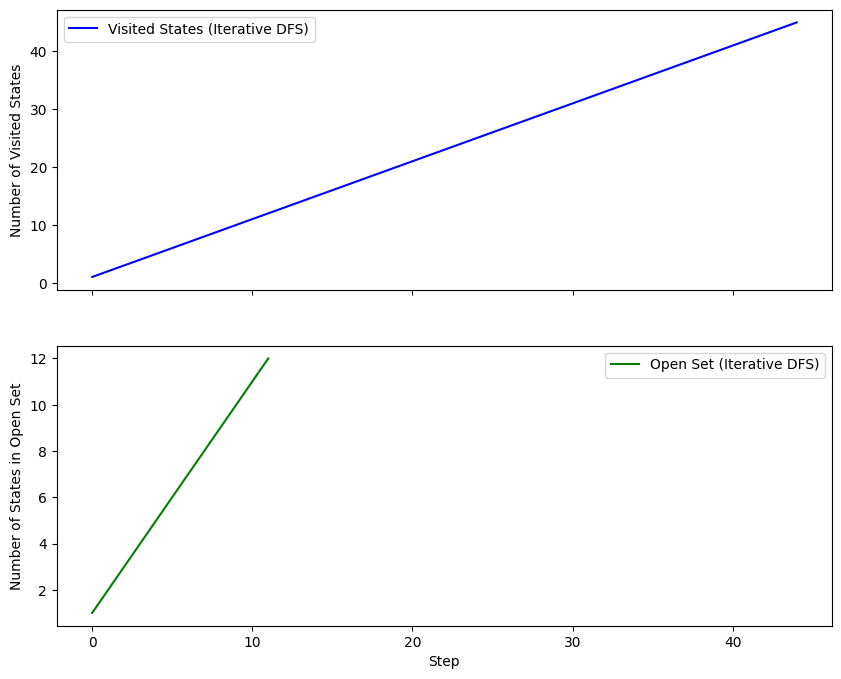

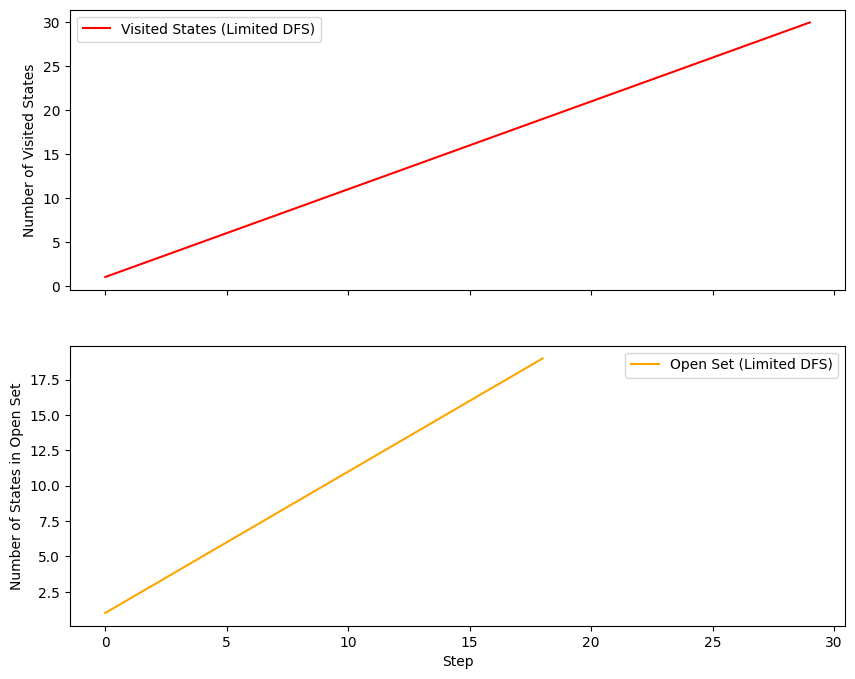

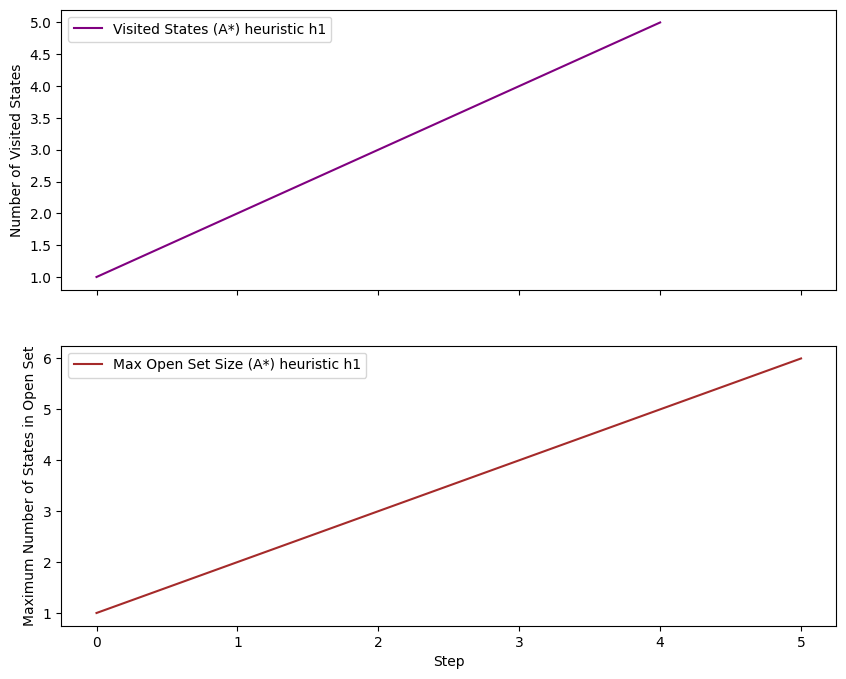

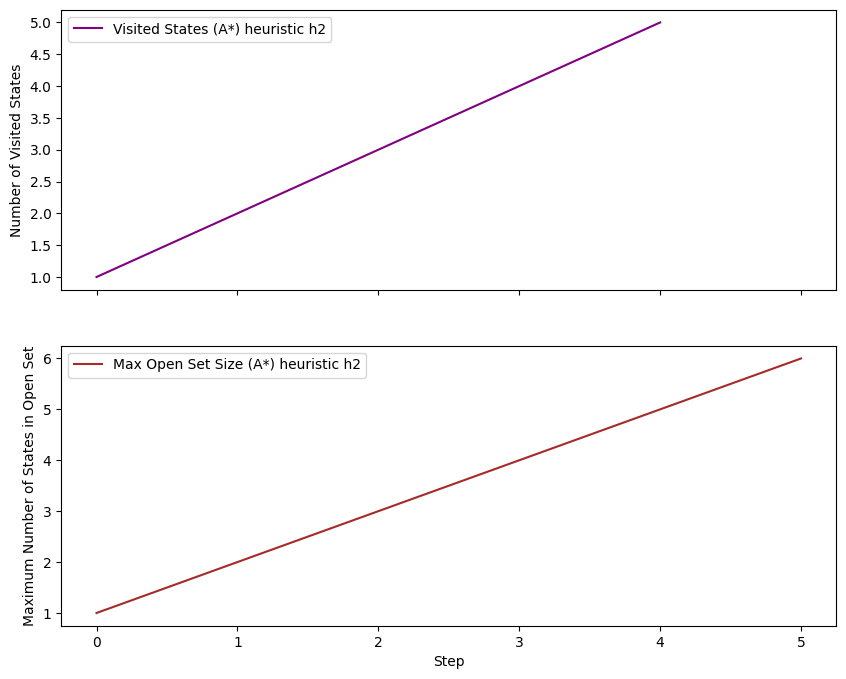

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot for iterative_depth_search
ax[0].plot(np.arange(1, visited_iterative + 1), label='Visited States (Iterative DFS)', color='blue')
ax[0].set_ylabel('Number of Visited States')
ax[0].legend()

ax[1].plot(np.arange(1, len(open_set_iterative) + 1), label='Open Set (Iterative DFS)', color='green')
ax[1].set_xlabel('Step')
ax[1].set_ylabel('Number of States in Open Set')
ax[1].legend()

# Plot for limited_depth_search
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax[0].plot(np.arange(1, visited_limited + 1), label='Visited States (Limited DFS)', color='red')
ax[0].set_ylabel('Number of Visited States')
ax[0].legend()

ax[1].plot(np.arange(1, len(open_set_limited) + 1), label='Open Set (Limited DFS)', color='orange')
ax[1].set_xlabel('Step')
ax[1].set_ylabel('Number of States in Open Set')
ax[1].legend()

# Plot for A* search for heuristic h1
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax[0].plot(np.arange(1, visited_a_star + 1), label='Visited States (A*) heuristic h1', color='purple')
ax[0].set_ylabel('Number of Visited States')
ax[0].legend()

ax[1].plot(np.arange(1, max_open_set_a_star + 1), label='Max Open Set Size (A*) heuristic h1', color='brown')
ax[1].set_xlabel('Step')
ax[1].set_ylabel('Maximum Number of States in Open Set')
ax[1].legend()
# Plot for A* search for heuristic h2
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax[0].plot(np.arange(1, visited_a_star2 + 1), label='Visited States (A*) heuristic h2', color='purple')
ax[0].set_ylabel('Number of Visited States')
ax[0].legend()

ax[1].plot(np.arange(1, max_open_set_a_star2 + 1), label='Max Open Set Size (A*) heuristic h2', color='brown')
ax[1].set_xlabel('Step')
ax[1].set_ylabel('Maximum Number of States in Open Set')
ax[1].legend()


plt.show()

    5. Augmenter la taille du jeu du Taquin (4x4, 7x7, 10x10). Comparer les algorithmes en fonction de l’évolution de la taille.

In [ ]:
import random

class Taquin2:
    def __init__(self, initial_state):
        self.state = initial_state
        self.n = len(initial_state)

    def __str__(self):
        return "\n".join([" ".join(map(str, row)) for row in self.state])

    def find_empty_tile(self):
        for i in range(self.n):
            for j in range(self.n):
                if self.state[i][j] == 0:
                    return i, j

    def move(self, direction):
        empty_tile_row, empty_tile_col = self.find_empty_tile()

        if direction == 'up':
            new_row = empty_tile_row - 1
            new_col = empty_tile_col
        elif direction == 'down':
            new_row = empty_tile_row + 1
            new_col = empty_tile_col
        elif direction == 'left':
            new_row = empty_tile_row
            new_col = empty_tile_col - 1
        elif direction == 'right':
            new_row = empty_tile_row
            new_col = empty_tile_col + 1
        else:
            return False  # Invalid movement

        if 0 <= new_row < self.n and 0 <= new_col < self.n:
            self.state[empty_tile_row][empty_tile_col], self.state[new_row][new_col] = \
                self.state[new_row][new_col], self.state[empty_tile_row][empty_tile_col]
            return True
        else:
            return False

    def is_goal(self):
        return self.state == [[i * self.n + j for j in range(self.n)] for i in range(self.n)]

    def shuffle(self):
        goal = [[i * self.n + j for j in range(self.n)] for i in range(self.n)]
        flat_goal = [num for row in goal for num in row]

        flat_state = random.sample(flat_goal, len(flat_goal))
        self.state = [flat_state[i:i+self.n] for i in range(0, len(flat_state), self.n)]


# Example of usage
n = 4  # You can change this to create an n x n grid
initial_state = [[i * n + j for j in range(n)] for i in range(n)]
taquin = Taquin2(initial_state)

print("Initial State:")
print(taquin)

taquin.shuffle()

print("\nAfter shuffling:")
print(taquin)


Initial State:
0 1 2 3
4 5 6 7
8 9 10 11
12 13 14 15

After shuffling:
0 4 13 11
10 6 14 15
8 2 12 5
9 7 3 1


The more we increment n the more Limited Depth Search is limited by the depth parameter and may miss the solution if the depth is not set appropriately. So it's Inefficient for large search spaces.

Iterative Deepening Search can still be inefficient for large search spaces due to repeated exploration of nodes at different depths.


A* is a complete and optimal algorithm when using an admissible and consistent heuristic. It intelligently explores the search space, focusing on more promising paths.

For small-sized puzzles or puzzles with relatively shallow solutions, limited depth search or iterative deepening search might be sufficient.
For larger puzzles or situations where efficiency is crucial, A* with a good heuristic is often preferred, as it can intelligently guide the search, potentially exploring fewer nodes.